In [1]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from matplotlib.pylab import rcParams
%matplotlib inline
import matplotlib.mlab as mlab
from scipy import stats 

In [2]:
rate = pd.read_csv('data.csv')
data = pd.read_csv('st1.csv')

In [3]:
size = int(len(data) * 0.57)

In [4]:
train, valid = data[0:size], data[size:size+52]

In [5]:
features = ['panic_disorder','funeral_arrangements','condolences','influenza','genitourinary',
            'sendentary','funeral_director','urbanicity','dietary','menopausal','ischaemic_heart_disease',
            'sweating','lung_disease','blotchy_hands','stillbirth','births_deaths','exsanguination',
            'palliative_care','suffocation','death_certificate','cremation','mortality','nervosa',
            'pathophysiological','funeral_flower','blood_viscosity','vomiting','death_notice','myocardial_infarction',
            'feet_swell','self_harming','Major_Depressive_Disorder','bloated','fester','violence','convulsion',
            'pain_medicine','funeral_ceremony','chesty_cough','opiates','Pulmonary_embolism','death_register',
            'bowel_disease','ischaemic','drug_therapy','domestic_violence','overcrowded','myocardial',
            'migration','carbon_monoxide_poisoning','high_cholesterol','homelessness','bronchitis',
            'funeral_services','hospital','snow','January','pneumonia','funeral','surgery','swine_flu',
            'damp','wheezing','sharp_pain','spit','alcohol','cellulitis','air_crash','thrombosis','death',
            ]

y_train = rate['weeklydeathrate'][0:size].values
x_train = train[features]
x_valid = valid[features]
y_valid = rate['weeklydeathrate'][size:size+52].values

In [6]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('data.csv',parse_dates=['date'],index_col=0,date_parser=dateparse)
L = data.index[size:size+52]

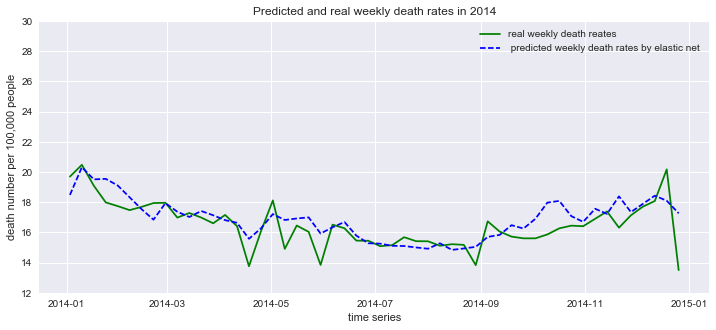

In [7]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=5.55,l1_ratio=0.5,max_iter=10000,tol=0.0001)
y_pred_enet = enet.fit(x_train, y_train).predict(x_valid)

x = L
z = y_valid
m = y_pred_enet
fig = plt.figure(figsize=(12,5))
plt.plot(x,z,label='real weekly death reates',color='green')
plt.plot(x,m,label=' predicted weekly death rates by elastic net',color="blue",linestyle='--')
plt.xlabel("time series")
plt.ylabel("death number per 100,000 people")
plt.title("Predicted and real weekly death rates in 2014")
from pylab import *
ylim(12,30)
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error, make_scorer
mse = mean_squared_error(y_valid, y_pred_enet)
RMSE = np.sqrt(mse)
RMSE

1.0774541247679794

In [9]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_valid, y_pred_enet, sample_weight=None, multioutput='uniform_average')
MAE

0.7777406572233575

In [10]:
from sklearn.utils import check_array
from sklearn.utils.validation import check_array
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean((np.abs((y_true - y_pred) / y_true)) * 100)
mape = mean_absolute_percentage_error(y_valid, y_pred_enet)
mape

4.8683269649168057

In [11]:
np.corrcoef(y_valid, y_pred_enet)

array([[ 1.        ,  0.75176491],
       [ 0.75176491,  1.        ]])